# Dask tutorial SciPyConf 2020
- Tutorial: https://github.com/dask/dask-tutorial
- Video: https://www.youtube.com/watch?v=EybGGLbLipI&list=PLYx7XA2nY5Gde-6QO98KUJ9iL_WW4rgYf&index=6

In [1]:
from dask.distributed import Client

client = Client()

In [2]:
client

Client Scheduler: tcp://127.0.0.1:36023 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 8 Cores: 64 Memory: 9.66 GB


In [3]:
from time import sleep

def inc(x):
    sleep(1)
    return x + 1

def add(x, y):
    sleep(1)
    return x + y

In [4]:
%%time
# This takes three seconds to run because we call each
# function sequentially, one after the other

x = inc(1)
y = inc(2)
z = add(x, y)

CPU times: user 350 ms, sys: 94 ms, total: 444 ms
Wall time: 3 s


In [5]:
from dask import delayed

In [6]:
%%time
# This runs immediately, all it does is build a graph

x = delayed(inc)(1)
y = delayed(inc)(2)
z = delayed(add)(x, y)

CPU times: user 3 ms, sys: 0 ns, total: 3 ms
Wall time: 2.4 ms


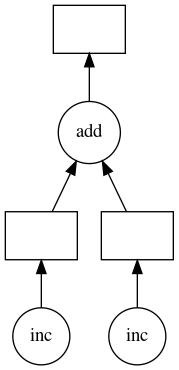

In [8]:
z.visualize()

In [10]:
%time z.compute()

CPU times: user 127 ms, sys: 45 ms, total: 172 ms
Wall time: 2.03 s


5

In [11]:
client.close()